In [15]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

---

#### <u>리지 회귀</u>

`리지(Ridge)`도 회귀를 위한 `선형 모델`이므로 `최소적합법`에서 사용한 것과 같은 예측 함수를 사용한다.<br>
하지만, `리지회귀`에서의 <b>가중치(`w`)</b>선택은 <u>훈련 데이터를 잘 예측</u>하기 위해서 뿐만 아니라 <u>추가 제약 조건을 만족</u>시키기 위한 목적도 있다.

여기서 추가 제약 조건이란

> 가중치의 절댓값을 가능한 작게 만드는 것

이다.

다시 말해서 `w`의 모든 원소가 0에 가깝게 되길 원하는 것이다.<br>
즉, 직관적으로 생각하면 <u>모든 특성이 출력에 주는 영향을 최소한</u>으로 만드는 것이다.

이런 제약을 `규제(regularization)`이라고 한다.<br>
`규제`란 `과대적합`이 되지않도록 모델을 강제로 제한한다는 의미이다.

> `리지회귀`에서 사용하는 규제방식은 `L2규제`이다.

`리지 회귀`는 `linear_model.Ridge`에 구현되어 있다.<br>
리지 회귀가 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살펴보자

In [7]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


결과는

- In `훈련 세트` : LinearRegression > Ridge
- In `테스트 세트` : LinearRegression < Ridge

따라서, `선형회귀`에서는 데이터셋이 `과대적합`되었지만, `Ridge`는 덜 자유로운 모델이기 때문에 `과대적합`이 적어진다. <u>모델의 복잡도가 낮아지면 훈련 세트에서의 성능이 나빠지지만 더 `일반화된 모델`</u>이 된다는 강점이 있다.

따라서, `Ridge`는 덜 자유로운 모델이기 때문에 과대적합이 적어집니다. 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됩니다. 
관심 있는 것은 테스트 세트에 대한 성능이기 때문에`LinearRegression`보다 `Ridge` 모델을 선택해야 합니다.

더불어, 사용자는 `Ridge`모델의 `alpha` 매개변수로 훈련세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다. 앞에서는 alpha = 0.1을 사용했지만 해당 값이 최적이라고는 할 수 없다. 최적의 alpha 값은 사용하는 데이터셋에 달려있다.

<u>`alpha`값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.</u>

또한 `alpha`의 값에 따라 모델의 `coef_`속성(즉 `w`계수)이 어떻게 달라지는지를 알아보면 다음과같다.<br>
(전체가 최소가된다는 개념을 가지고 생각하면 이해하기 쉽다)

- `alpha`값이 높아짐 -> `coef_`의 절댓값 크기가 작아짐
- `alpha`값이 작아짐 -> `coef_`의 절대값 크가가 커짐

In [13]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

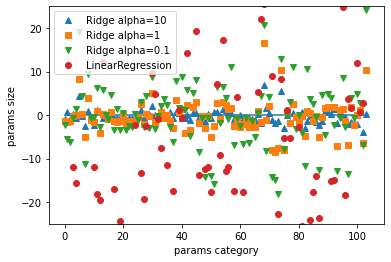

In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge   = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("params category")
plt.ylabel("params size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

이 그림에서 x축은 `coef_`의 원소를 위치대로 나열한 것이다.<br>
즉 `x = 0`는 첫 번째 특성에 연관된 계수이고, `x = 1`은 두 번째 특성에 연관된 계수이다.<br>
이런 식으로 `x = 100`까지 계속된다. y축은 각 계수의 수치를 나타낸다.

- alpha = 10 일때, 대부분의 계수는 -3과 3사이에 위치한다.
- alpha = 1 일때, Ridge 모델의 계수는 alpha = 10일때 보다 커진다.
- alpha = 0.1 일때, 계수는 더 커진다.
- 아무런 규제가 없는(alpha = 0) 즉 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어간다.

`규제`의 효과를 이해하는 또 다른 방법은 <u>`alpha`값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것</u>이다.

다음 그림은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여<br>
`LinearRegression`과 `Ridge(alpha = 1)`을 적용한 것이다.<br>
(데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 `학습곡선(learning curve)`라 한다.)

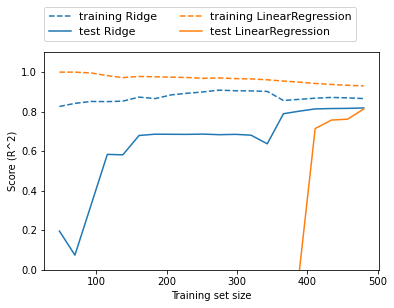

In [16]:
mglearn.plots.plot_ridge_n_samples()

예상대로 모든 데이터셋에 대해<br>
`릿지`와 `선형회귀` 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.

`릿지`에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 `선형 회귀`의 훈련 데이터 점수보다 낮다.

그러나, 테스트 데이터에서는 `릿지`의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 그렇다.

데이터셋 크기가 400미만에서는 `선형 회귀`는 어떤 것도 학습하지 못하고 있다.<br>
(이는 400미만의 값에서는 선형회귀는 과적합을 일으키기에 릿지회귀가 더 적합한 모델임을 의미한다)<br>
두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 `선형 회귀`가 `릿지 회귀`를 따라잡는다.<br>
여기서 중요한 점은 데이터를 충분히 주면 규제 항은 덜 중요해져서 `릿지 회귀` 와 `선형 회귀`의 성능이 같아질 것이라는 점이다.

마지막으로, `선형 회귀`의 훈련 데이터 성능이 데이터가 많아질수록 감소하는 것 또한 관측된다.<br>
이는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)
- https://tensorflow.blog/%ed%8c%8c%ec%9d%b4%ec%8d%ac-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d/2-3-3-%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8/